<a href="https://colab.research.google.com/github/mgarbanzo/tallerCienciasGOES16/blob/master/CUARTO_DIA_Taller_24_H_FISYMET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi?source=aws&satellite=noaa-goes16&domain=F&product=ABI-L2-CMIP&date=2020-11-16&hour=18

In [1]:
!pip install netCDF4

     |████████████████████████████████| 4.3MB 7.1MB/s 
     |████████████████████████████████| 296kB 43.8MB/s 


In [2]:
import pylab as plt
import numpy as np
from netCDF4 import Dataset

In [3]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/321/18/OR_ABI-L2-CMIPF-M6C01_G16_s20203211800151_e20203211809459_c20203211809545.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/321/18/OR_ABI-L2-CMIPF-M6C02_G16_s20203211800151_e20203211809459_c20203211809540.nc

--2020-12-18 18:17:37--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/321/18/OR_ABI-L2-CMIPF-M6C01_G16_s20203211800151_e20203211809459_c20203211809545.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.129.51
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.129.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98367034 (94M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C01_G16_s20203211800151_e20203211809459_c20203211809545.nc’

OR_ABI-L2-CMIPF-M6C 100%[===================>]  93.81M  33.8MB/s    in 2.8s    

2020-12-18 18:17:40 (33.8 MB/s) - ‘OR_ABI-L2-CMIPF-M6C01_G16_s20203211800151_e20203211809459_c20203211809545.nc’ saved [98367034/98367034]

--2020-12-18 18:17:40--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/321/18/OR_ABI-L2-CMIPF-M6C02_G16_s20203211800151_e20203211809459_c20203211809540.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 5

In [4]:
ncABIC01 = Dataset("/content/OR_ABI-L2-CMIPF-M6C01_G16_s20203211800151_e20203211809459_c20203211809545.nc")
ncABIC02 = Dataset("/content/OR_ABI-L2-CMIPF-M6C02_G16_s20203211800151_e20203211809459_c20203211809540.nc")

In [6]:
ncABIC02

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 0.5km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-CMIPF-M6C02_G16_s20203211800151_e20203211809459_c20203211809540.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    title: ABI L2 Cloud and Moisture Imagery
    summary: Single reflective band Cloud and Moisture Imagery Produc

In [7]:
datos1 = ncABIC01.variables['CMI'][:,:]
datos2 = ncABIC02.variables['CMI'][:,:]

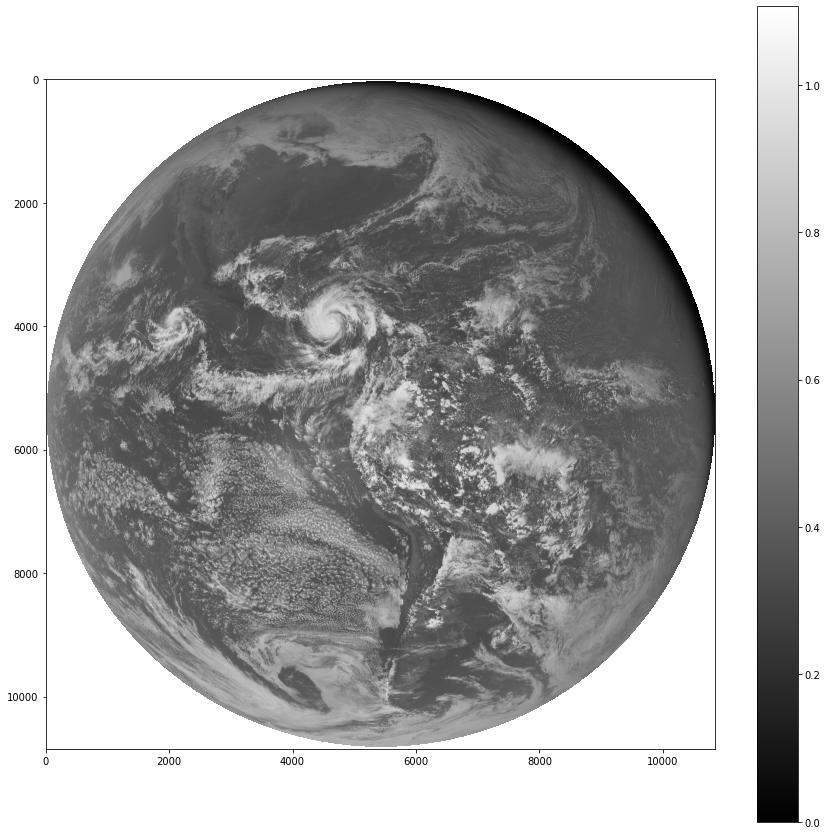

In [9]:
fig, ax = plt.subplots(1,figsize=(15,15))
plt.imshow(datos1**.5,cmap='gray')
plt.colorbar()

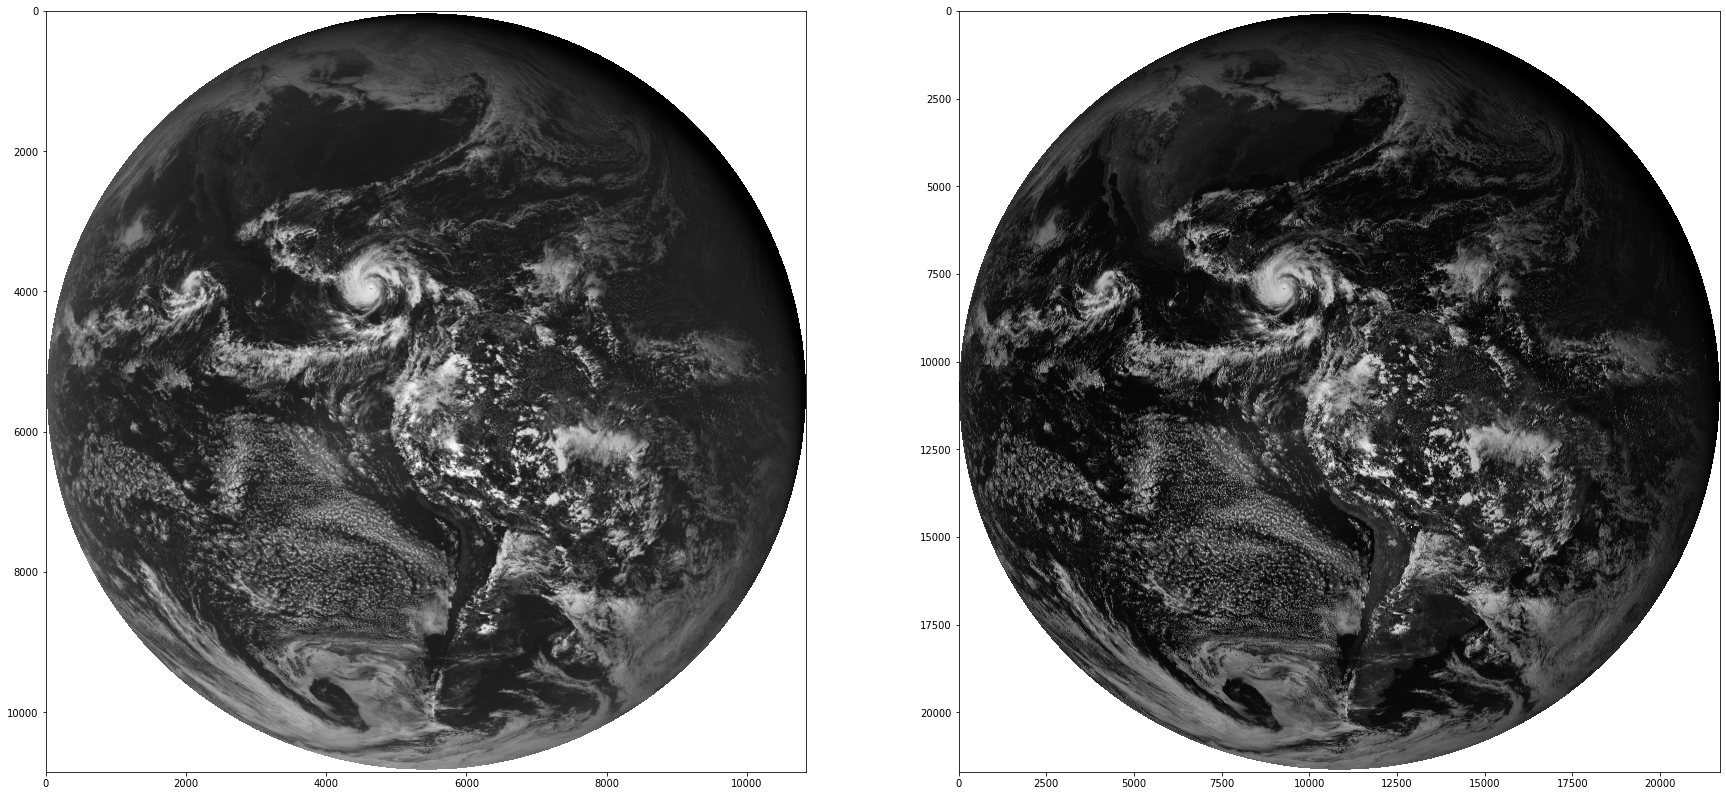

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,15))
ax1.imshow(datos1,cmap='gray',vmin=0, vmax=1)
ax2.imshow(datos2,cmap='gray',vmin=0, vmax=1)

In [22]:
corte1 = datos1[:,5424]
corte2 = datos2[:,10848]

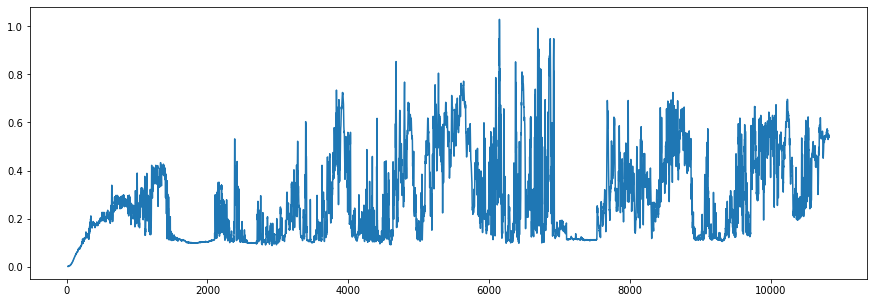

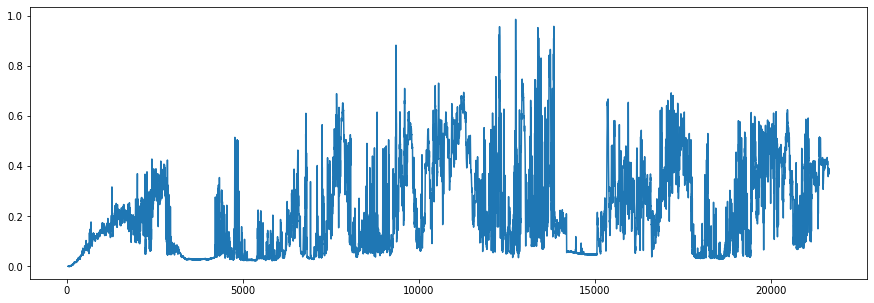

In [13]:
plt.figure(figsize=(15,5))
plt.plot(corte1)
plt.figure(figsize=(15,5))
plt.plot(corte2)

# Fourier

In [23]:
W = np.hamming(len(corte1))
corte1 = W * (corte1 - np.mean(corte1))

In [24]:
W = np.hamming(len(corte2))
corte2 = W * (corte2 - np.mean(corte2))

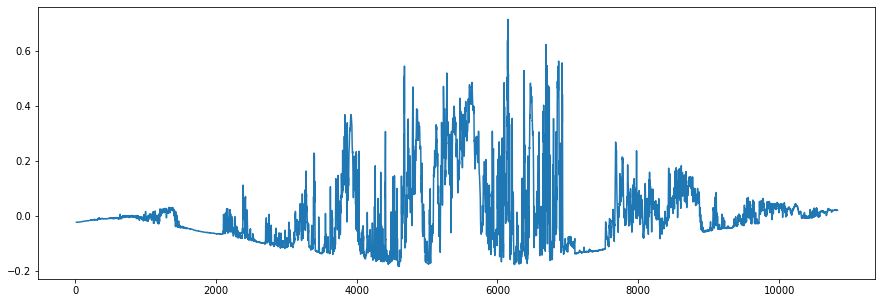

In [25]:
plt.figure(figsize=(15,5))
plt.plot(corte1)

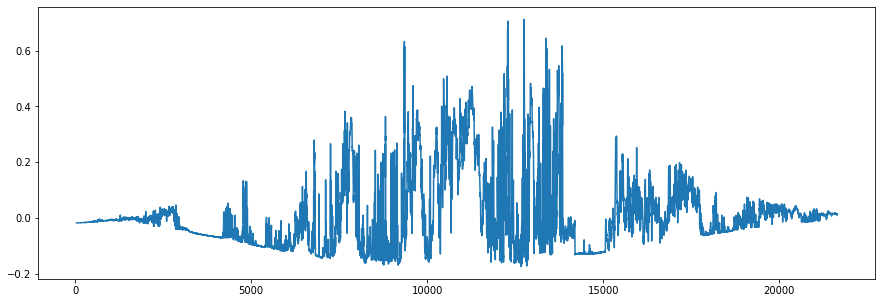

In [26]:
plt.figure(figsize=(15,5))
plt.plot(corte2)

In [29]:
FT1 = np.fft.fft(corte1,n=2*len(corte1))
FT2 = np.fft.fft(corte2)

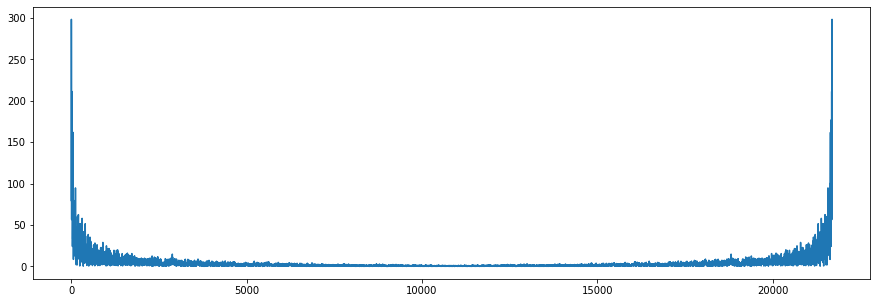

In [30]:
plt.figure(figsize=(15,5))
plt.plot(np.abs(FT1))

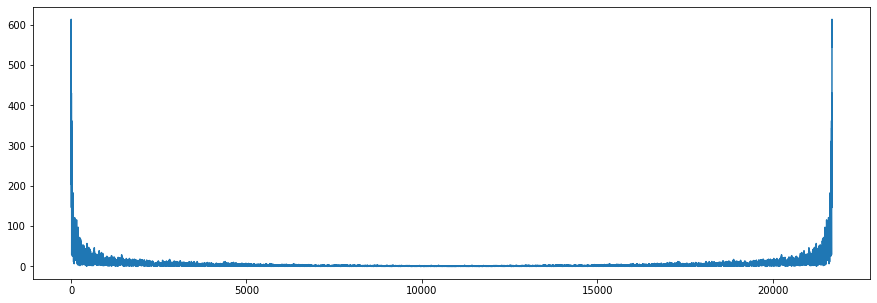

In [28]:
plt.figure(figsize=(15,5))
plt.plot(np.abs(FT2))

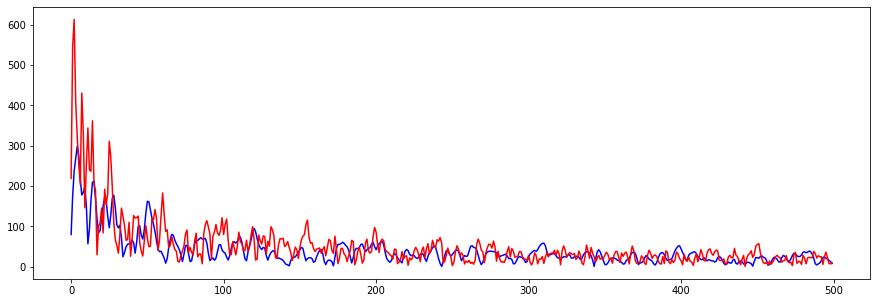

In [34]:
plt.figure(figsize=(15,5))
plt.plot(np.abs(FT1[0:500]),'-b')
plt.plot(np.abs(FT2[0:500]),'-r')

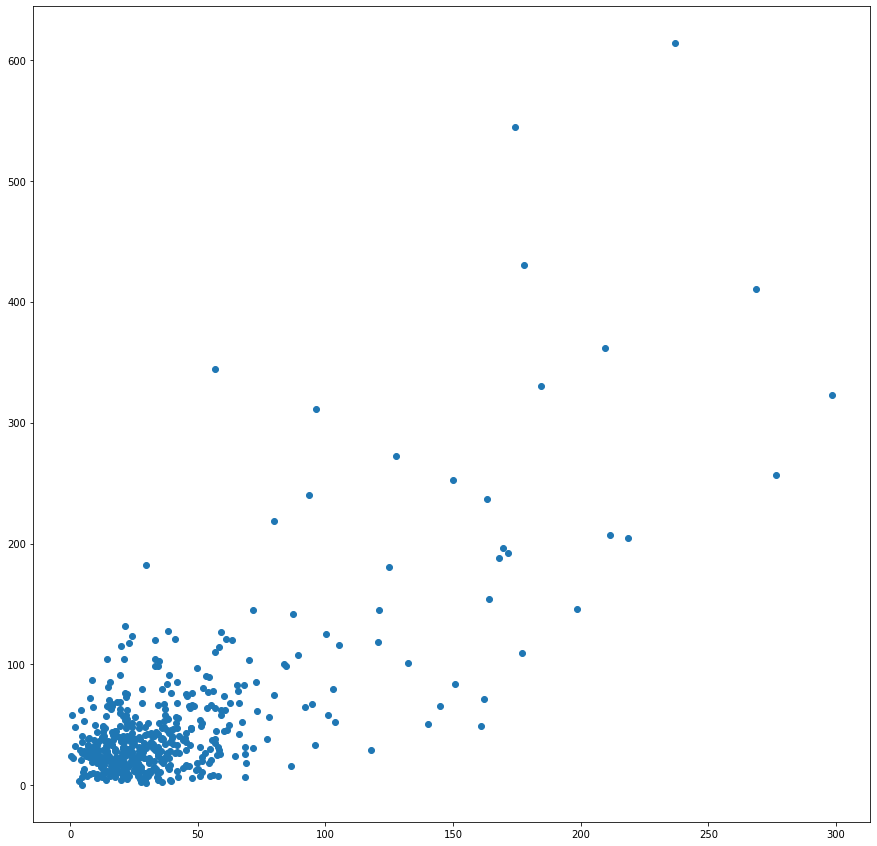

In [37]:
plt.figure(figsize=(15,15))
plt.scatter(np.abs(FT1[0:500]),np.abs(FT2[0:500]))

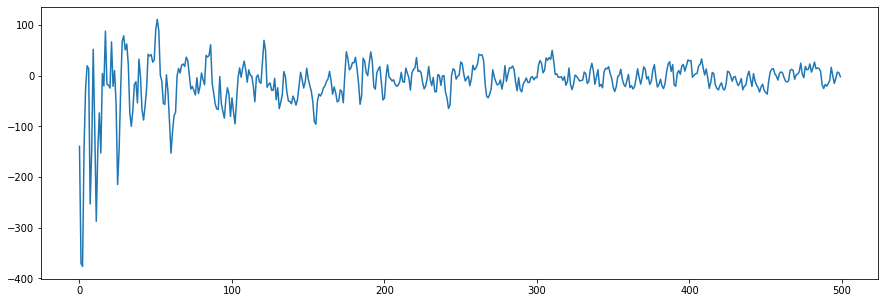

In [36]:
plt.figure(figsize=(15,5))
plt.plot(np.abs(FT1[0:500])-np.abs(FT2[0:500]))